# 🏥 Medical Insurance Cost Prediction

This project explores healthcare analytics using a medical insurance dataset. The goal is to understand how demographic and health factors influence medical costs and to develop models for prediction, classification, and clustering.

---

## 📌 Objectives
- Predict annual medical insurance charges (Regression)
- Classify individuals by health/risk level
- Cluster similar health and insurance profiles
- Analyze relationships between demographics, health factors, and costs

---
## 🧰 Tools & Libraries
- Python, Pandas, NumPy  
- Scikit-learn  
- Matplotlib, Seaborn  
- Jupyter Notebook

### 📦 Project Libraries - install

In [1]:
%pip install -q -U pandas numpy matplotlib seaborn scikit-learn  
# Install and upgrade essential packages:
# pandas & numpy -> data manipulation and numerical operations
# matplotlib & seaborn -> data visualization
# scikit-learn -> machine learning (regression, classification, clustering)

%pip install -q -U watermark  
# Install/upgrade watermark to display package versions and environment info

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### 📦 Project Libraries - import

This section lists all the Python libraries used in this project. 
Keeping them organized here helps with reproducibility and makes it easier to install dependencies.

In [3]:
# Importing the library for data manipulation in tables
import pandas as pd 

# Importing the NumPy library for mathematical operations and arrays
import numpy as np  

# Importing the Matplotlib library for generating plots
import matplotlib.pyplot as plt

# Jupyter Notebook magic command to display plots directly in the notebook
%matplotlib inline

# Importing the Seaborn library for statistical data visualization
import seaborn as sns

# scikit learn area:

# Import for regression
from sklearn.linear_model import LinearRegression  

# Import for classification
from sklearn.ensemble import RandomForestClassifier  

# Import for clustering
from sklearn.cluster import KMeans  

# Import for splitting dataset
from sklearn.model_selection import train_test_split  

# Import for evaluating models
from sklearn.metrics import mean_squared_error, accuracy_score



# Load the watermark extension
%reload_ext watermark

# Display metadata for your notebook
%watermark -a "Maykon Analysis" -d -u -v -p numpy,pandas,matplotlib,seaborn,scikit-learn

Author: Maykon Analysis

Last updated: 2025-11-24

Python implementation: CPython
Python version       : 3.13.7
IPython version      : 9.7.0

numpy       : 2.3.5
pandas      : 2.3.3
matplotlib  : 3.10.7
seaborn     : 0.13.2
scikit-learn: 1.7.2



#### Loading a dataset into your working environment (using the pandas library).

In [4]:
# load the data
data = r"C:\Users\LarTI\OneDrive\Desktop\Projects\Medical-Insurance-Cost-Prediction-\data\medical_insurance.csv"

df = pd.read_csv(data)

In [3]:
df.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [5]:
df.info()   # shows column types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  object 
 13  

In [6]:
df.describe()   # summary statistics for numerical columns

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


In [7]:
df.isnull().sum()   # count missing values in each column

person_id                          0
age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
policy_term_years                  0
p

#### Our dataset has only one column with missing values:

alcohol_freq → 30,083 missing values

In [9]:
df['alcohol_freq'].value_counts(dropna=False)  # count all values, including missing ones

alcohol_freq
Occasional    45078
NaN           30083
Weekly        19833
Daily          5006
Name: count, dtype: int64

In [11]:
df['alcohol_freq'] = df['alcohol_freq'].fillna('Unknown', inplace=True)  # replace missing values with "Unknown"

In [12]:
df.dtypes  # check the data type of each column

person_id                        int64
age                              int64
sex                             object
region                          object
urban_rural                     object
income                         float64
education                       object
marital_status                  object
employment_status               object
household_size                   int64
dependents                       int64
bmi                            float64
smoker                          object
alcohol_freq                    object
visits_last_year                 int64
hospitalizations_last_3yrs       int64
days_hospitalized_last_3yrs      int64
medication_count                 int64
systolic_bp                    float64
diastolic_bp                   float64
ldl                            float64
hba1c                          float64
plan_type                       object
network_tier                    object
deductible                       int64
copay                    

In [13]:
df.duplicated().sum()  # check how many duplicated rows exist

np.int64(0)

#### Explore the Target Variable
Check its distribution to understand the range, outliers, and whether a transformation is needed:


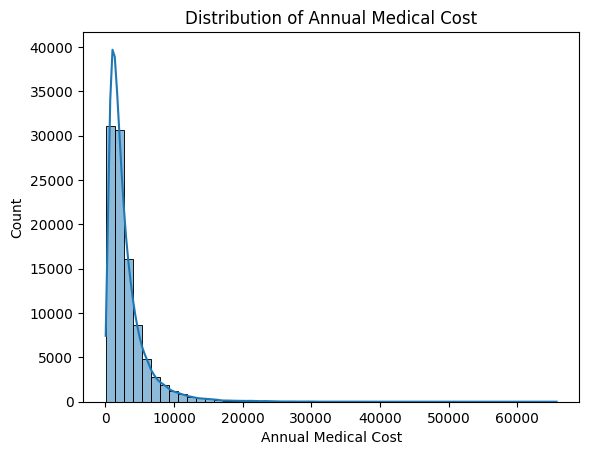

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of the target variable
sns.histplot(df['annual_medical_cost'], bins=50, kde=True)  # histogram + density curve
plt.title('Distribution of Annual Medical Cost')  # plot title
plt.xlabel('Annual Medical Cost')  # x-axis label
plt.ylabel('Count')  # y-axis label
plt.show()  # display the plot

In [17]:
# Check skewness of the target
df['annual_medical_cost'].skew()  # >0: right-skewed, <0: left-skewed


np.float64(4.030317894409436)

In [18]:
import numpy as np  

df['annual_medical_cost_log'] = np.log1p(df['annual_medical_cost'])  # log-transform to reduce skewness

#This will make the distribution more normal and help the model perform better

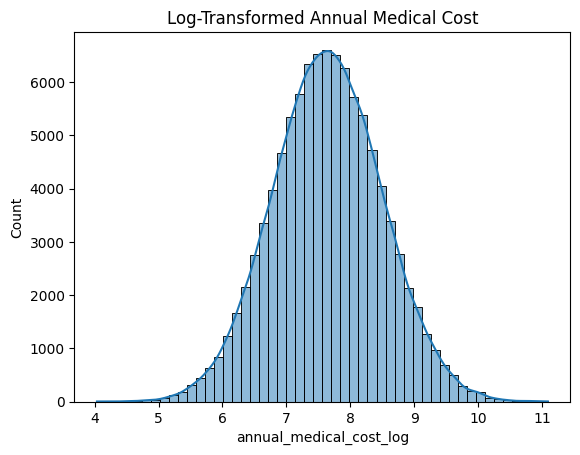

In [19]:
sns.histplot(df['annual_medical_cost_log'], bins=50, kde=True)
plt.title('Log-Transformed Annual Medical Cost')
plt.show()

In [20]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlations with the target
corr = df[num_cols].corr()['annual_medical_cost'].sort_values(ascending=False)

print(corr)


annual_medical_cost            1.000000
monthly_premium                0.965416
annual_premium                 0.965415
annual_medical_cost_log        0.826147
total_claims_paid              0.739402
avg_claim_amount               0.632996
risk_score                     0.305971
chronic_count                  0.296720
is_high_risk                   0.251923
days_hospitalized_last_3yrs    0.230246
hospitalizations_last_3yrs     0.208640
visits_last_year               0.195631
claims_count                   0.179082
hypertension                   0.154309
had_major_procedure            0.148292
systolic_bp                    0.145070
age                            0.131166
mental_health                  0.126232
diastolic_bp                   0.117647
arthritis                      0.115375
medication_count               0.113456
diabetes                       0.107373
hba1c                          0.083416
asthma                         0.080830
cardiovascular_disease         0.078515


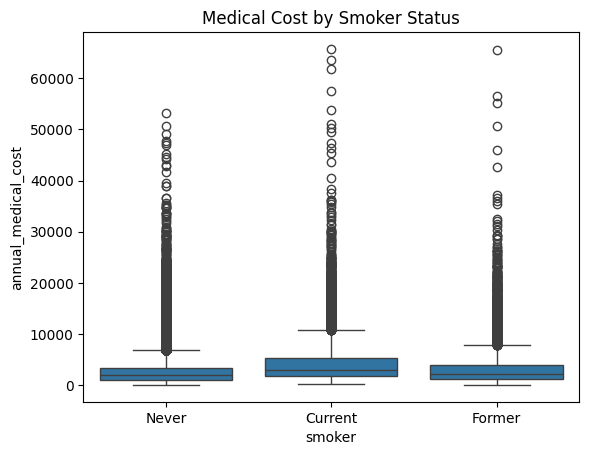

In [22]:
# Example: effect of smoker status on annual medical cost
sns.boxplot(x='smoker', y='annual_medical_cost', data=df)
plt.title('Medical Cost by Smoker Status')
plt.show()

#### Feature Preprocessing 
handle your features so a machine learning model can use them. 
Separate Features and Target:

In [23]:
X = df.drop(['annual_medical_cost', 'annual_medical_cost_log'], axis=1)  # features
y = df['annual_medical_cost_log']  # target (log-transformed)

X = pd.get_dummies(X, drop_first=True)  # avoids multicollinearity

#### Scale Numerical Features (optional but recommended for some models)

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

"""
Why this matters:
Models like Linear Regression, Random Forest, or XGBoost need numeric input. 
Scaling helps algorithms converge faster and handle features with different ranges. 
Encoding categorical features ensures the model can interpret them correctly. 
Once you run this, the dataset is ready to split into training and test sets for modeling.
"""